We demonstrate using a custom `Dataset` implementation.

We first import the data as in 3.

In [3]:
from fastai.vision.all import *

path = untar_data(URLs.IMAGENETTE_160)
t = get_image_files(path)
lbls = t.map(Self.parent.name()).unique()
lidx = lbls.val2idx()
y = L(lidx[o.parent.name] for o in t)
train_filt = L(o.parent.parent.name == 'train' for o in t)
train, valid = t[train_filt], t[~train_filt]
train_y, valid_y = y[train_filt], t[~train_filt]

Now we define the `Dataset` class. The minimal requirement is that it supports indexing via `__getitem__` and that it supports `len`.

In [4]:
class Dataset:
    def __init__(self, fns_ys):
        self.fns, self.ys = fns_ys
    def __len__(self):
        return len(self.fns)
    def __getitem__(self, i):
        im = Image.open(self.fns[i]).resize((64,64)).convert('RGB')
        return tensor(im).float()/255, tensor(self.ys[i])

We now try out using it.

In [5]:
train_ds, valid_ds = Dataset((train, train_y)), Dataset((valid, valid_y))
x, y = train_ds[0]
x.shape, y

(torch.Size([64, 64, 3]), tensor(0))

<Axes: title={'center': 'n03000684'}>

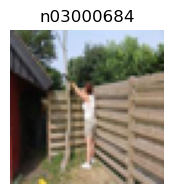

In [6]:
show_image(x, title=lbls[y])